In [16]:
from random import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sympy.abc import alpha

gym_df = pd.read_csv('./data/gym_members_exercise_tracking.csv')

# *Gym Members Data Analysis*
## Loading dataset 
- The data-set that I am operating on you can find on Kaggle website under the following address: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?resource=download 
- As I get to know from the description of this data-set, it is a collection of gym members' exercise tracking data. It provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators.  

In [17]:
gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [18]:
gym_df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [19]:
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [20]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [21]:
gym_df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [22]:
gym_df.shape

(973, 15)

## As we can see, we have 973 rows and 15 columns in the dataset. It does not have missing values, which is a huge pro. 
We can see that the data is quite clean and ready for further analysis.
The columns that it contains are as follows:
- **ID** - unique identifier of the gym member
- **Age** - age of the gym member
- **Weight** - weight of the gym member (kg)
- **Height** - height of the gym member (m)
- **Max_BPM** - maximum heart rate of the gym member (beats per minute)
- **Rest_BPM** - resting heart rate of the gym member (beats per minute)
- **Session_Duration** - duration of the gym session (hours)
- **Calories_Burned** - number of calories burned during the gym session
- **Workout_Type** - type of the workout(e.g., cardio, strength, etc.)
- **Fat_Percentage** - percentage of body fat of the gym member
- **Water_Intake** - amount of water intake of the gym member during workout (liters)
- **Workout_Frequency** - frequency of the gym member's workout (times per week)
- **Experience_Level** - experience level of the gym member (e.g., beginner, intermediate, advanced)
- **BMI** - body mass index of the gym member

## To let to know more about the columns, I will plot distribution of them and say a word or two.

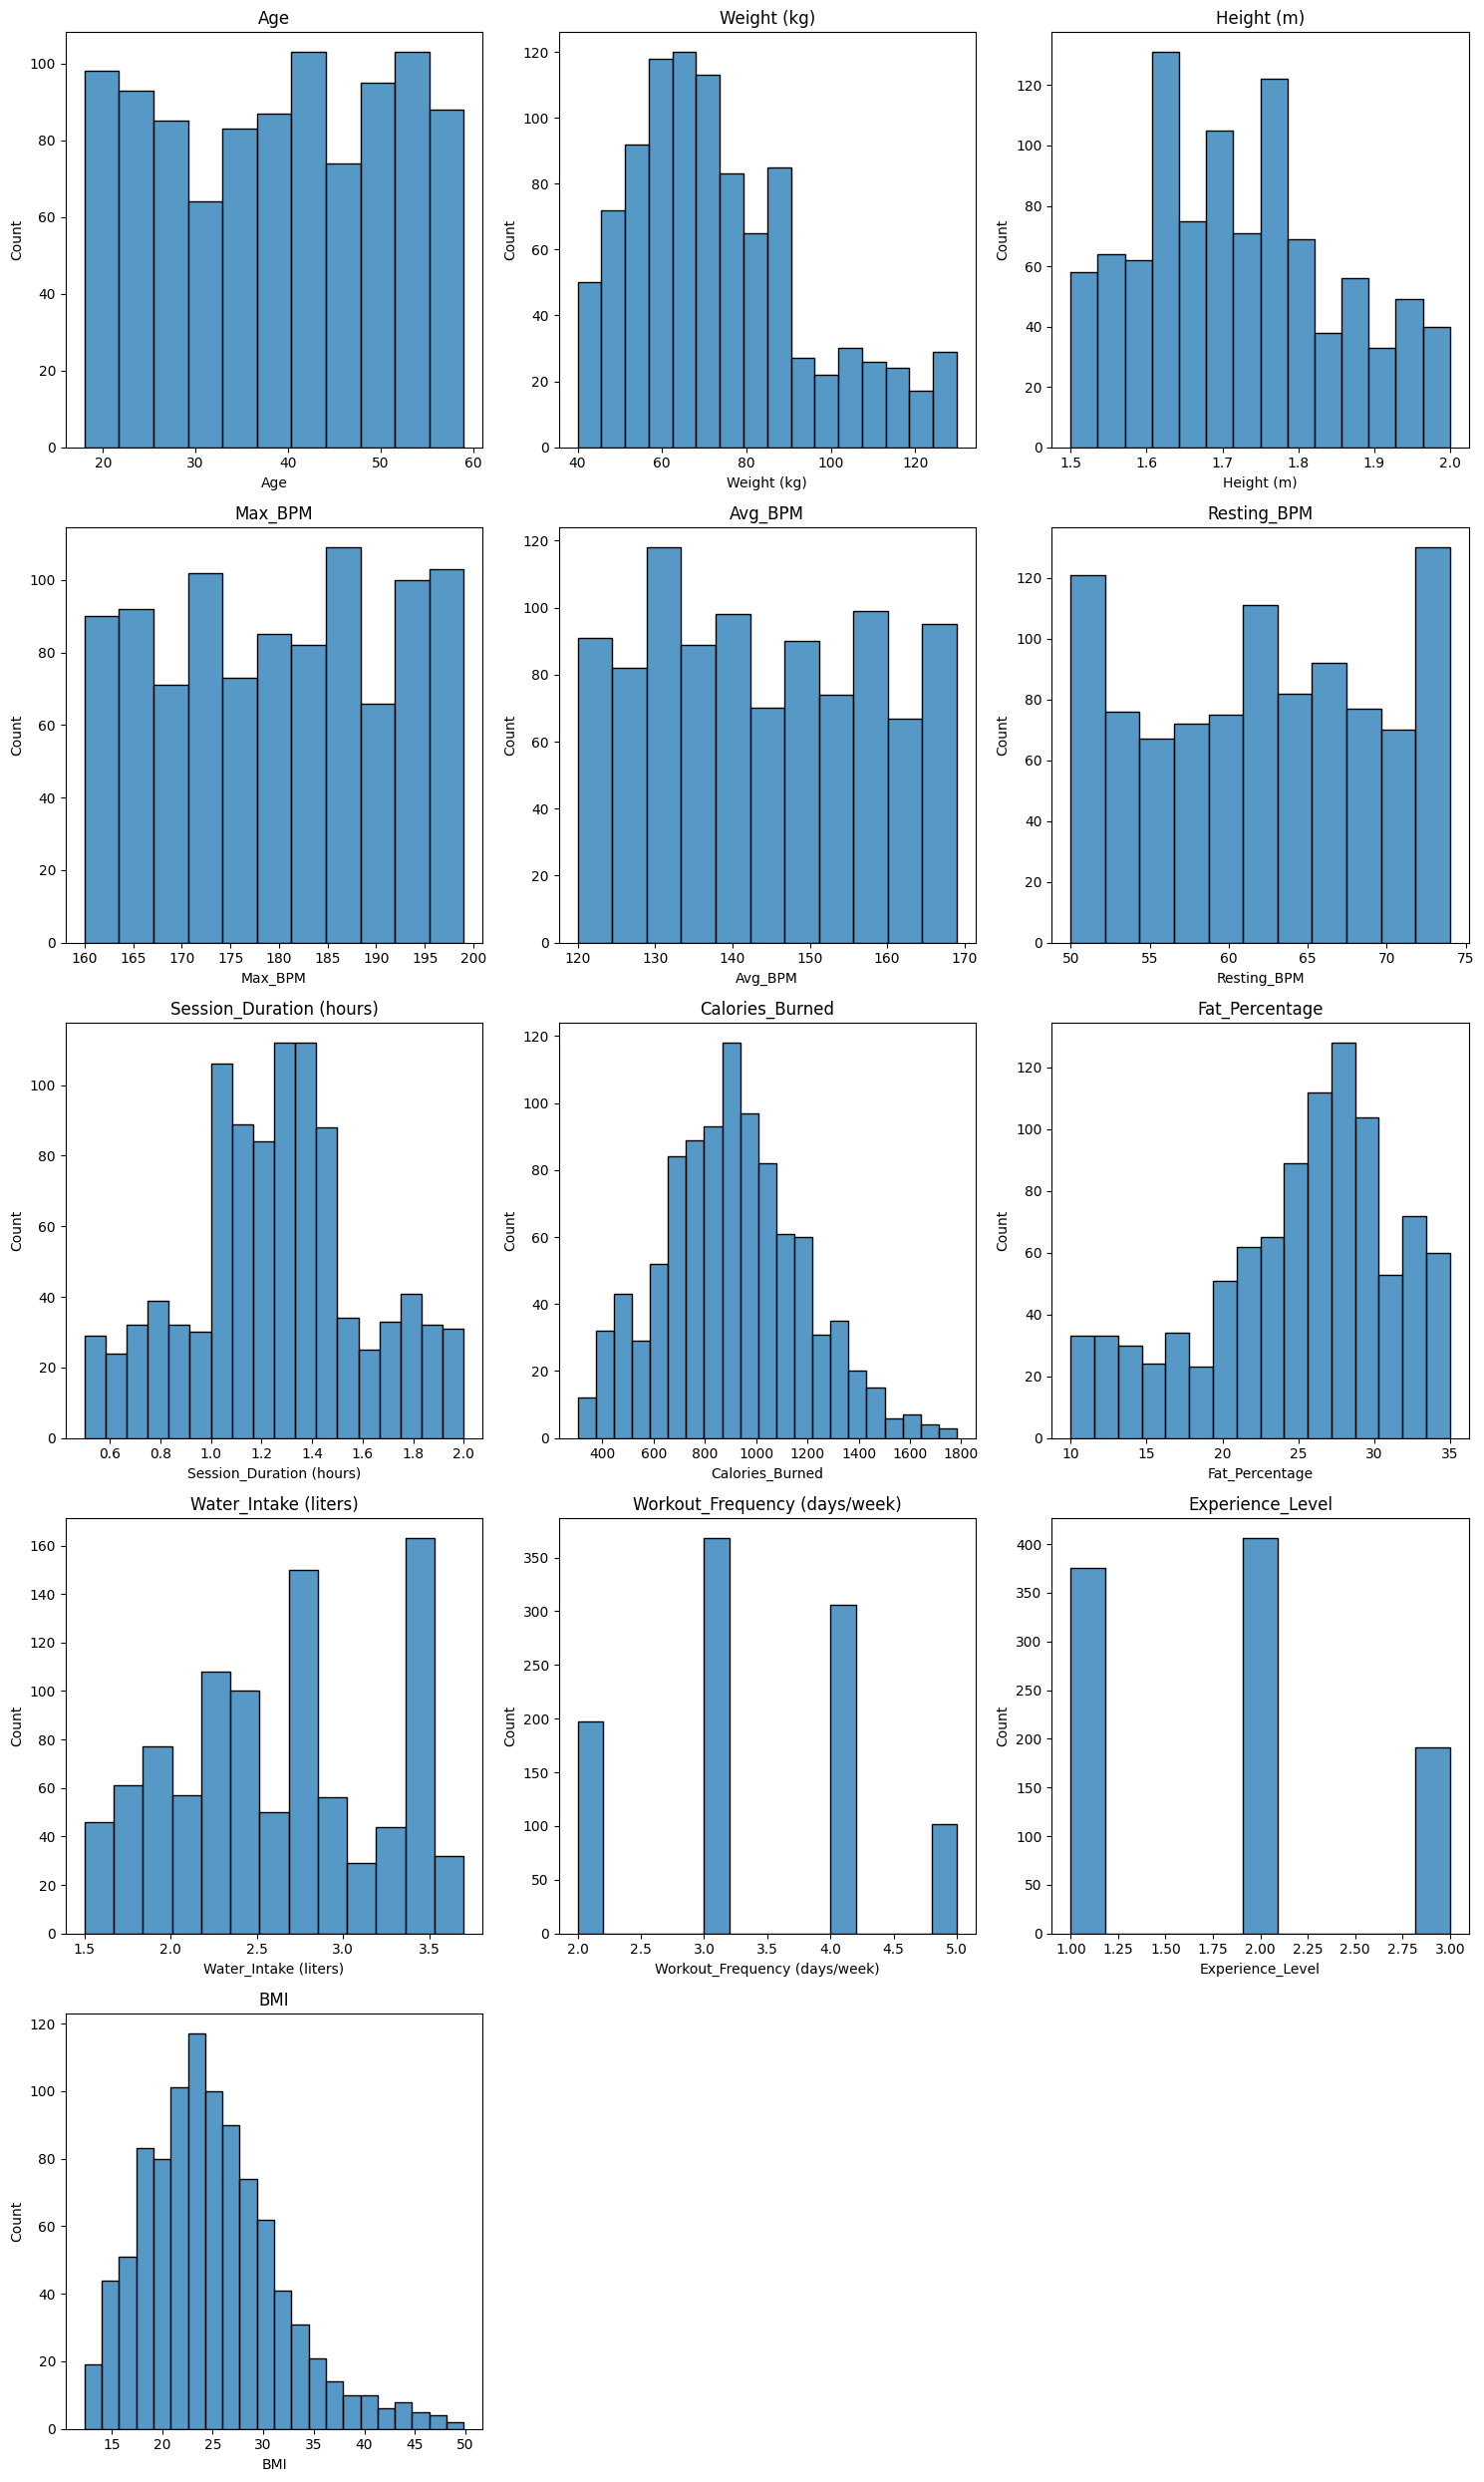

In [23]:
num_cols = 3
num_plots = len(gym_df.select_dtypes(include="number").columns)
num_rows = int(num_plots / num_cols + 1)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  #making it one dimensional array for easier indexing

for i, column in enumerate(gym_df.select_dtypes(include="number").columns):
    sns.histplot(data=gym_df, x=column, ax=axes[i])
    axes[i].set_title(f"{column}")

for j in range(num_plots, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## From the plots above, I can see that the distributions of the columns are varied. It seems to me, that the data is quite diverse and it will be interesting to analyze it. 

## Before I proceed with classification, I would like to take a look at the correlation matrix of the dataset.

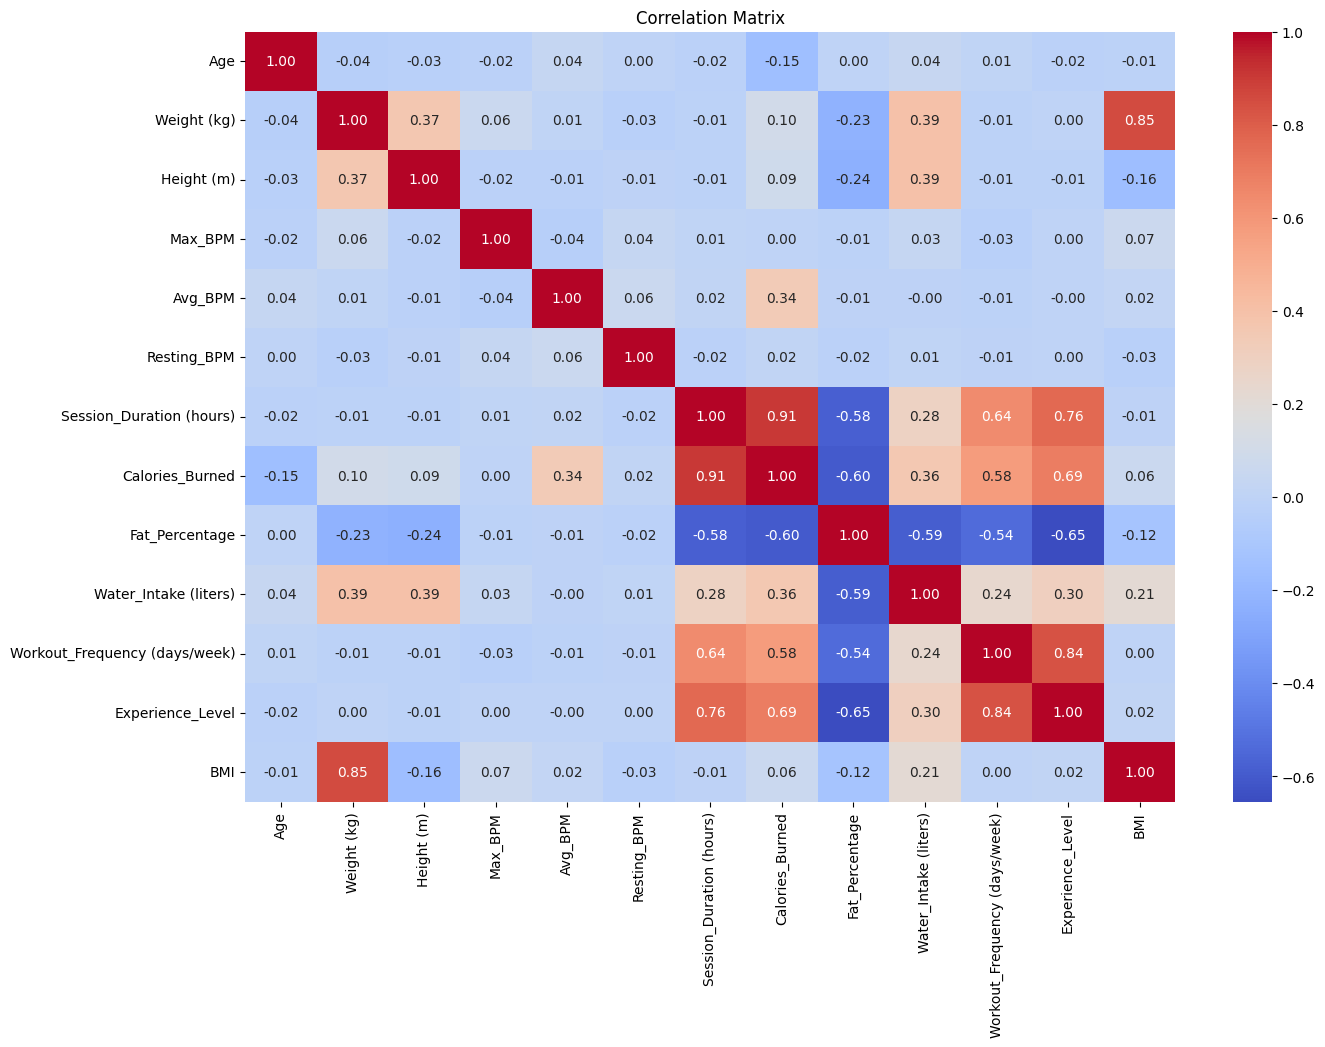

In [24]:
correlation_matrix = gym_df.select_dtypes(include="number").corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## From the correlation matrix, I can see that there are several variables that are highly correlated with each other. For example:
- **Workout_Frequency** and **Experience_Level** have a correlation of **0.84**
- **Session_Duration** and **Experience_Level** have a correlation of **0.76**
- **Weight** and **BMI** have a correlation of **0.85**
- many others

## Having that done, I will proceed with the classification task. I will try to predict the **Gender** based on the other columns.

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# I will encode the categorical columns
encoder = LabelEncoder()
gym_df['Gender'] = encoder.fit_transform(gym_df['Gender']) # Male: 1, Female: 0
gym_df['Workout_Type'] = encoder.fit_transform(gym_df['Workout_Type'])

# Scaling the numerical data
scaler = StandardScaler()
numerical_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']
gym_df[numerical_columns] = scaler.fit_transform(gym_df[numerical_columns])

# Splitting the data into features and target
X = gym_df.drop(columns=['Gender']) # Features: Everything except Workout_Type
y = gym_df['Gender'] # Target: Workout_Type

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model using Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9897435897435898
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       1.00      0.98      0.99        97

    accuracy                           0.99       195
   macro avg       0.99      0.99      0.99       195
weighted avg       0.99      0.99      0.99       195

Confusion Matrix:
[[98  0]
 [ 2 95]]


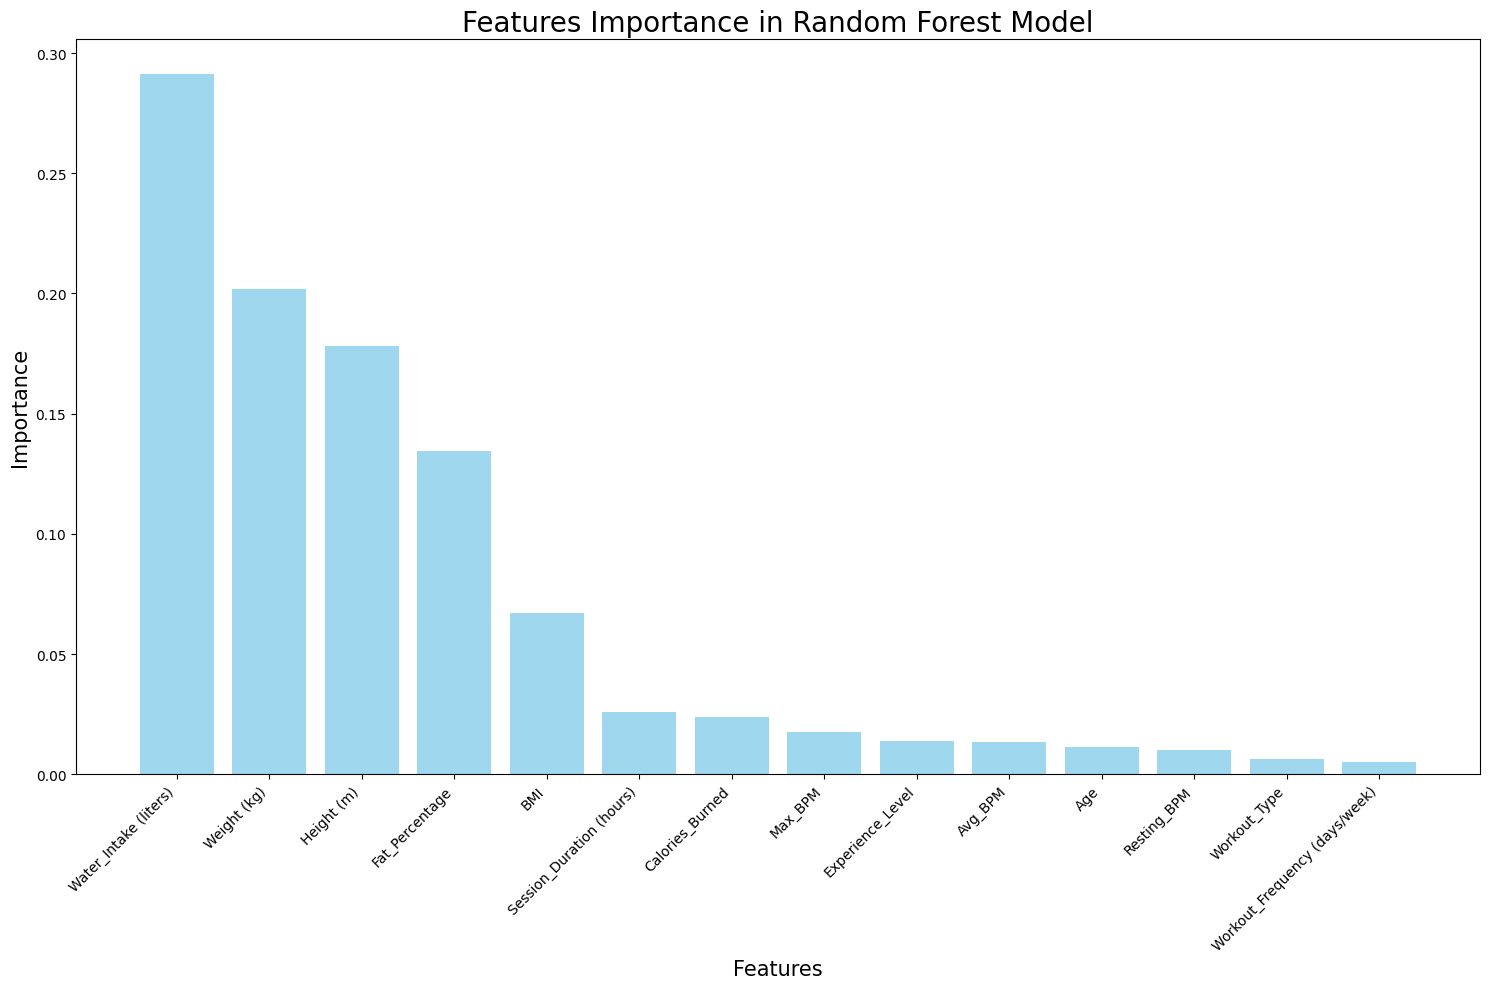

In [37]:

# extract features importance from the Random Forest model
features_importance = model.feature_importances_
feature_names = X.columns

# Sort the features importance in descending order
sorted_indices = np.argsort(features_importance)[::-1]
sorted_importance = features_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the features importance
plt.figure(figsize=(15, 10))
plt.bar(range(len(sorted_importance)), sorted_importance, align='center', alpha=0.8, color='skyblue')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation=45, ha='right')
plt.title("Features Importance in Random Forest Model", fontsize=20)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Importance", fontsize=15)
plt.tight_layout()
plt.show()